In [121]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [167]:
df1=pd.read_csv("./data/2014_Financial_Data.csv")
df2=pd.read_csv("./data/2015_Financial_Data.csv")
df3=pd.read_csv("./data/2016_Financial_Data.csv")
df4=pd.read_csv("./data/2017_Financial_Data.csv")
df5=pd.read_csv("./data/2018_Financial_Data.csv")

In [168]:
df1.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [169]:
def better_than_spy(row, spy_var):
    price_var = row['PRICE_VAR']
    if price_var > spy_var:
        return 1
    else:
        return 0

In [170]:
# Drop stock ticker and sector
df1 = df1.drop(df1.columns[0], axis = 1)
df2 = df2.drop(df2.columns[0], axis = 1)
df3 = df3.drop(df3.columns[0], axis = 1)
df4 = df4.drop(df4.columns[0], axis = 1)
df5 = df5.drop(df5.columns[0], axis = 1)

df1.drop(['Sector'], axis=1, inplace=True)
df2.drop(['Sector'], axis=1, inplace=True)
df3.drop(['Sector'], axis=1, inplace=True)
df4.drop(['Sector'], axis=1, inplace=True)
df5.drop(['Sector'], axis=1, inplace=True)

df1['Year'] = 2014
df2['Year'] = 2015
df3['Year'] = 2016
df4['Year'] = 2017
df5['Year'] = 2018

# Rename price var
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

In [172]:
spy = pd.read_csv("./data/SPY.csv", index_col='Date')

spy2015 = spy.loc[['2015-01-01','2016-01-01']]['Open']
spy2015change = ((spy2015[1] - spy2015[0]) / spy2015[0]) * 100
df1['Beat Spy'] = df1.apply(lambda row: better_than_spy(row, spy2015change), axis=1)

spy2016 = spy.loc[['2016-01-01','2017-01-01']]['Open']
spy2016change = ((spy2016[1] - spy2016[0]) / spy2016[0]) * 100
df2['Beat Spy'] = df2.apply(lambda row: better_than_spy(row, spy2016change), axis=1)

spy2017 = spy.loc[['2017-01-01','2018-01-01']]['Open']
spy2017change = ((spy2017[1] - spy2017[0]) / spy2017[0]) * 100
df3['Beat Spy'] = df3.apply(lambda row: better_than_spy(row, spy2017change), axis=1)

spy2018 = spy.loc[['2018-01-01','2019-01-01']]['Open']
spy2018change = ((spy2018[1] - spy2018[0]) / spy2018[0]) * 100
df4['Beat Spy'] = df4.apply(lambda row: better_than_spy(row, spy2018change), axis=1)

spy2019 = spy.loc[['2019-01-01','2020-01-01']]['Open']
spy2019change = ((spy2019[1] - spy2019[0]) / spy2019[0]) * 100
df5['Beat Spy'] = df5.apply(lambda row: better_than_spy(row, spy2019change), axis=1)

In [173]:
imputer = KNNImputer(n_neighbors=10, weights='distance', metric='nan_euclidean', copy=True)

df1_clean = imputer.fit_transform(df1)
df1_clean = pd.DataFrame(df1_clean)
df1_clean.columns = list(df1)

df2_clean = imputer.fit_transform(df2)
df2_clean = pd.DataFrame(df2_clean)
df2_clean.columns = list(df2)

df3_clean = imputer.fit_transform(df3)
df3_clean = pd.DataFrame(df3_clean)
df3_clean.columns = list(df3)

df4_clean = imputer.fit_transform(df4)
df4_clean = pd.DataFrame(df4_clean)
df4_clean.columns = list(df4)

df5_clean = imputer.fit_transform(df5)
df5_clean = pd.DataFrame(df5_clean)
df5_clean.columns = list(df5)

In [174]:
data = pd.concat([df1_clean, df2_clean, df3_clean, df4_clean, df5_clean])

Text(0.5, 1.0, '2019 Returns')

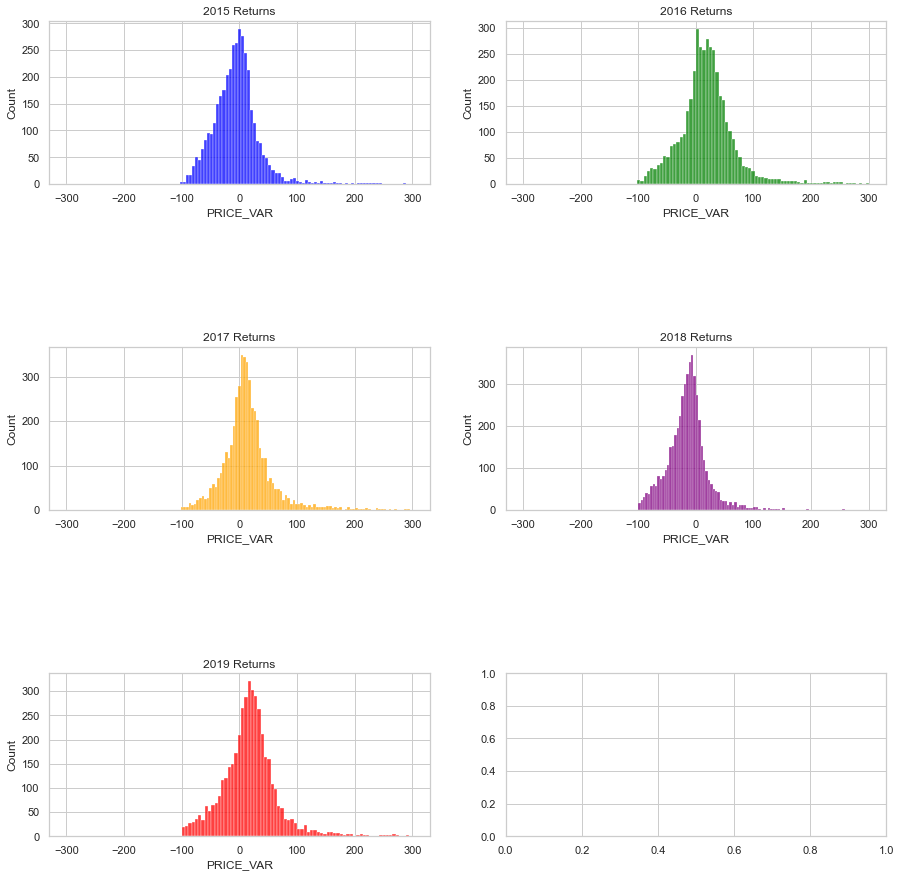

In [175]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=1)
sns.histplot(data=df1['PRICE_VAR'], binrange=(-300,300), stat='count', color='blue', ax=axs[0, 0]).set_title('2015 Returns')
sns.histplot(data=df2['PRICE_VAR'], binrange=(-300,300), stat='count', color='green', ax=axs[0, 1]).set_title('2016 Returns')
sns.histplot(data=df3['PRICE_VAR'], binrange=(-300,300), stat='count', color='orange', ax=axs[1, 0]).set_title('2017 Returns')
sns.histplot(data=df4['PRICE_VAR'], binrange=(-300,300), stat='count', color='purple', ax=axs[1, 1]).set_title('2018 Returns')
sns.histplot(data=df5['PRICE_VAR'], binrange=(-300,300), stat='count', color='red', ax=axs[2, 0]).set_title('2019 Returns')

<AxesSubplot:xlabel='PRICE_VAR', ylabel='Density'>

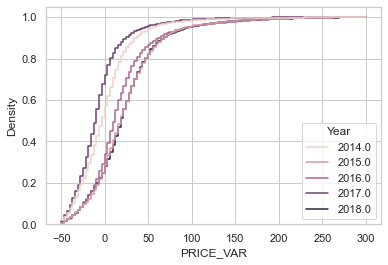

In [202]:
sns.histplot(
    data=data, x='PRICE_VAR', hue='Year',
    element="step", fill=False,
    cumulative=True, common_norm=False, stat='density', binrange=(-50,300)
)

In [192]:
print(f"In {df1['Year'][0]}, {(sum(df1['Beat Spy'] == 1) / len(df1['Beat Spy']))*100}% of companies had better performance than SPY the next year")
print(f"In {df2['Year'][0]}, {(sum(df2['Beat Spy'] == 1) / len(df2['Beat Spy']))*100}% of companies had better performance than SPY the next year")
print(f"In {df3['Year'][0]}, {(sum(df3['Beat Spy'] == 1) / len(df3['Beat Spy']))*100}% of companies had better performance than SPY the next year")
print(f"In {df4['Year'][0]}, {(sum(df4['Beat Spy'] == 1) / len(df4['Beat Spy']))*100}% of companies had better performance than SPY the next year")
print(f"In {df5['Year'][0]}, {(sum(df5['Beat Spy'] == 1) / len(df5['Beat Spy']))*100}% of companies had better performance than SPY the next year")
print("\n")
print(f"In {df1['Year'][0]}, {(sum(df1['Class'] == 1) / len(df1['Class']))*100}% of companies had positive stock growth the next year")
print(f"In {df2['Year'][0]}, {(sum(df2['Class'] == 1) / len(df2['Class']))*100}% of companies had positive stock growth the next year")
print(f"In {df3['Year'][0]}, {(sum(df3['Class'] == 1) / len(df3['Class']))*100}% of companies had positive stock growth the next year")
print(f"In {df4['Year'][0]}, {(sum(df4['Class'] == 1) / len(df4['Class']))*100}% of companies had positive stock growth the next year")
print(f"In {df5['Year'][0]}, {(sum(df5['Class'] == 1) / len(df5['Class']))*100}% of companies had positive stock growth the next year")

In 2014, 46.58613445378151% of companies had better performance than SPY the next year
In 2015, 55.46116504854369% of companies had better performance than SPY the next year
In 2016, 37.91953304148426% of companies had better performance than SPY the next year
In 2017, 41.16935483870968% of companies had better performance than SPY the next year
In 2018, 33.310564663023676% of companies had better performance than SPY the next year


In 2014, 42.909663865546214% of companies had positive stock growth the next year
In 2015, 70.16990291262137% of companies had positive stock growth the next year
In 2016, 67.0835939128622% of companies had positive stock growth the next year
In 2017, 27.62096774193548% of companies had positive stock growth the next year
In 2018, 69.35336976320583% of companies had positive stock growth the next year


In [203]:
X = data.iloc[:,:-4]
y = data.iloc[:,-1:] # for spy, do -3 for buy/sell
y = np.array([int(i[0]) for i in y.values.tolist()])

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [205]:
transformer = RobustScaler(unit_variance=True).fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [206]:
svm = SVC(C=1, gamma='scale', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [207]:
target_names = ['Doesnt Beat SPY', 'Beats SPY']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Doesnt Beat SPY       0.58      0.98      0.73      3225
      Beats SPY       0.44      0.02      0.04      2295

       accuracy                           0.58      5520
      macro avg       0.51      0.50      0.39      5520
   weighted avg       0.53      0.58      0.45      5520

